Import biblioteci și setări vizuale

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu


# Setări vizuale generale
%matplotlib inline
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

Upload și citire CSV

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

if len(uploaded) > 0:
    csv_file = list(uploaded.keys())[0]
    print(f"\n Fisier incarcat: {csv_file}\n")
    try:
        df = pd.read_csv(csv_file)
        print("Datele au fost încărcate cu succes în variabila df.")
        print("Dimensiune dataset (shape):", df.shape)
    except Exception as e:
        print("Eroare la citirea CSV-ului:", e)
else:
    print("Nu s-a încărcat niciun fișier. Re-rulează această celulă și selectează fișierul.")


Saving diabetes.csv to diabetes.csv

 Fisier incarcat: diabetes.csv

Datele au fost încărcate cu succes în variabila df.
Dimensiune dataset (shape): (768, 9)


Informații și statistici descriptive

In [ ]:
print("1) Primele 5 rânduri:")
display(df.head())


print("\n2) Shape (rânduri, coloane):", df.shape)


print("\n3) Tipuri de date și non-null counts:")
display(df.info())


print("\n4) Statistici descriptive:")
display(df.describe())


# Verificare zero-uri suspecte în coloanele biologic importante
suspect_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\n5) Număr de zero-uri în coloane suspecte:")
for c in suspect_cols:
    if c in df.columns:
       print(f" - {c}: {(df[c] == 0).sum()} zero-uri")


# Distribuția target-ului Outcome
print("\n6) Distribuția Outcome:")
display(df['Outcome'].value_counts().to_frame(name='count'))

1) Primele 5 rânduri:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



2) Shape (rânduri, coloane): (768, 9)

3) Tipuri de date și non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


4) Statistici descriptive:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



5) Număr de zero-uri în coloane suspecte:
 - Glucose: 5 zero-uri
 - BloodPressure: 35 zero-uri
 - SkinThickness: 227 zero-uri
 - Insulin: 374 zero-uri
 - BMI: 11 zero-uri

6) Distribuția Outcome:


,count
Outcome,
0,500
1,268


Curățarea datelor și heatmap valori lipsă

Număr valori lipsă după transformare:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


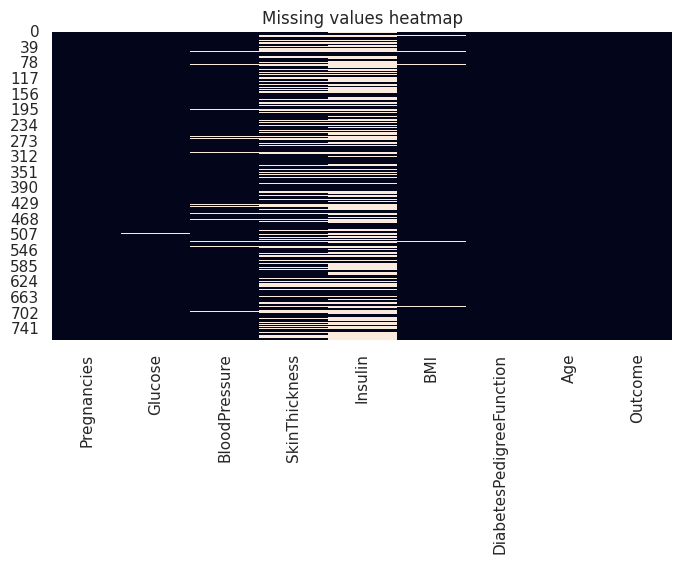

In [ ]:
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df_clean = df.copy()
df_clean[cols_with_zeros] = df_clean[cols_with_zeros].replace(0, np.nan)


print('Număr valori lipsă după transformare:')
print(df_clean.isna().sum())


# Heatmap valori lipsă
plt.figure(figsize=(8,4))
sns.heatmap(df_clean.isna(), cbar=False)
plt.title('Missing values heatmap')
plt.show()

Histograme și KDE univariate

---

Se poate observa distribuția și posibilele skew-uri ale variabilelor.

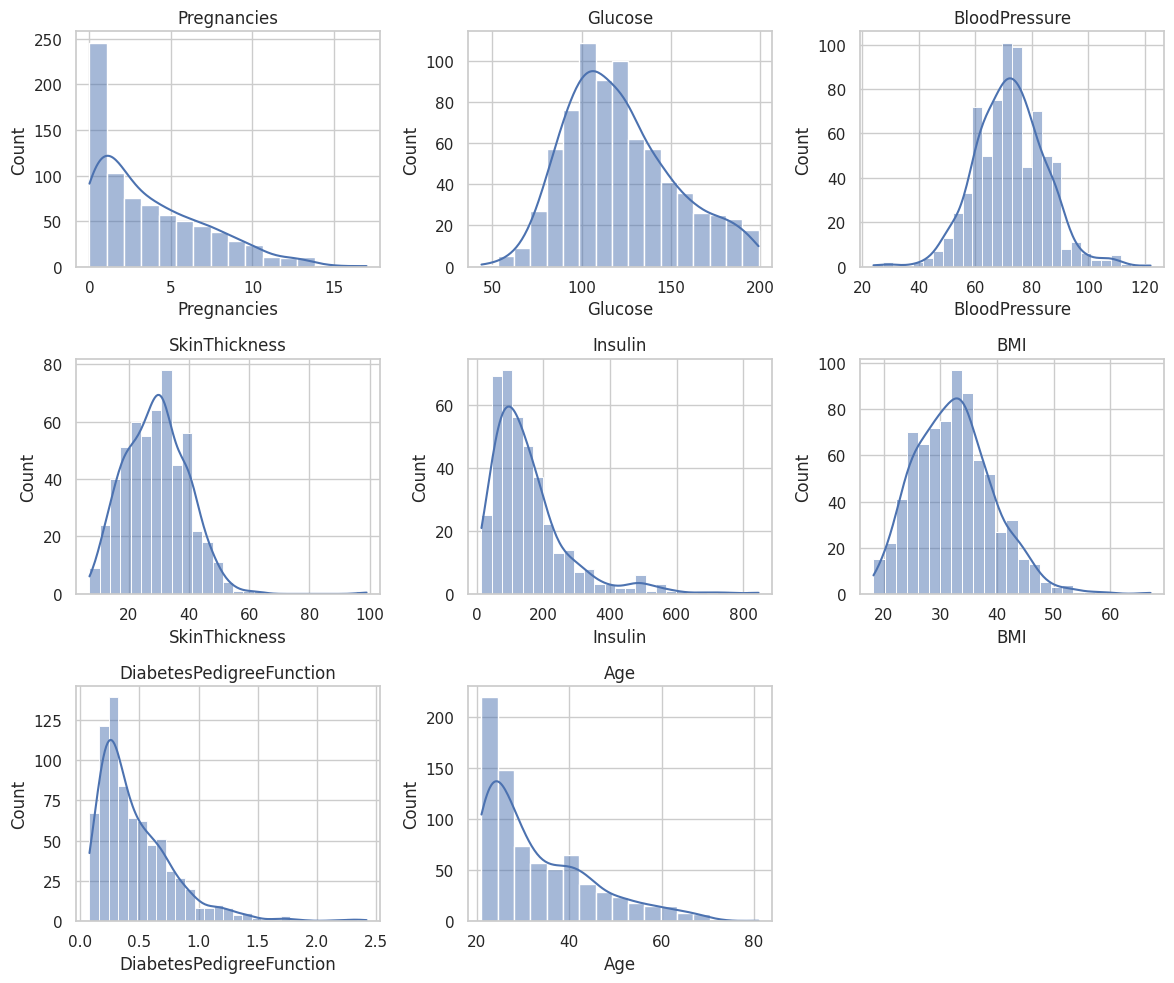

In [ ]:
numeric_cols = df_clean.columns.drop('Outcome')
plt.figure(figsize=(12,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(df_clean[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Boxplots predictor vs Outcome

---
Evidențiază diferențele medii și outlier-ii între clase


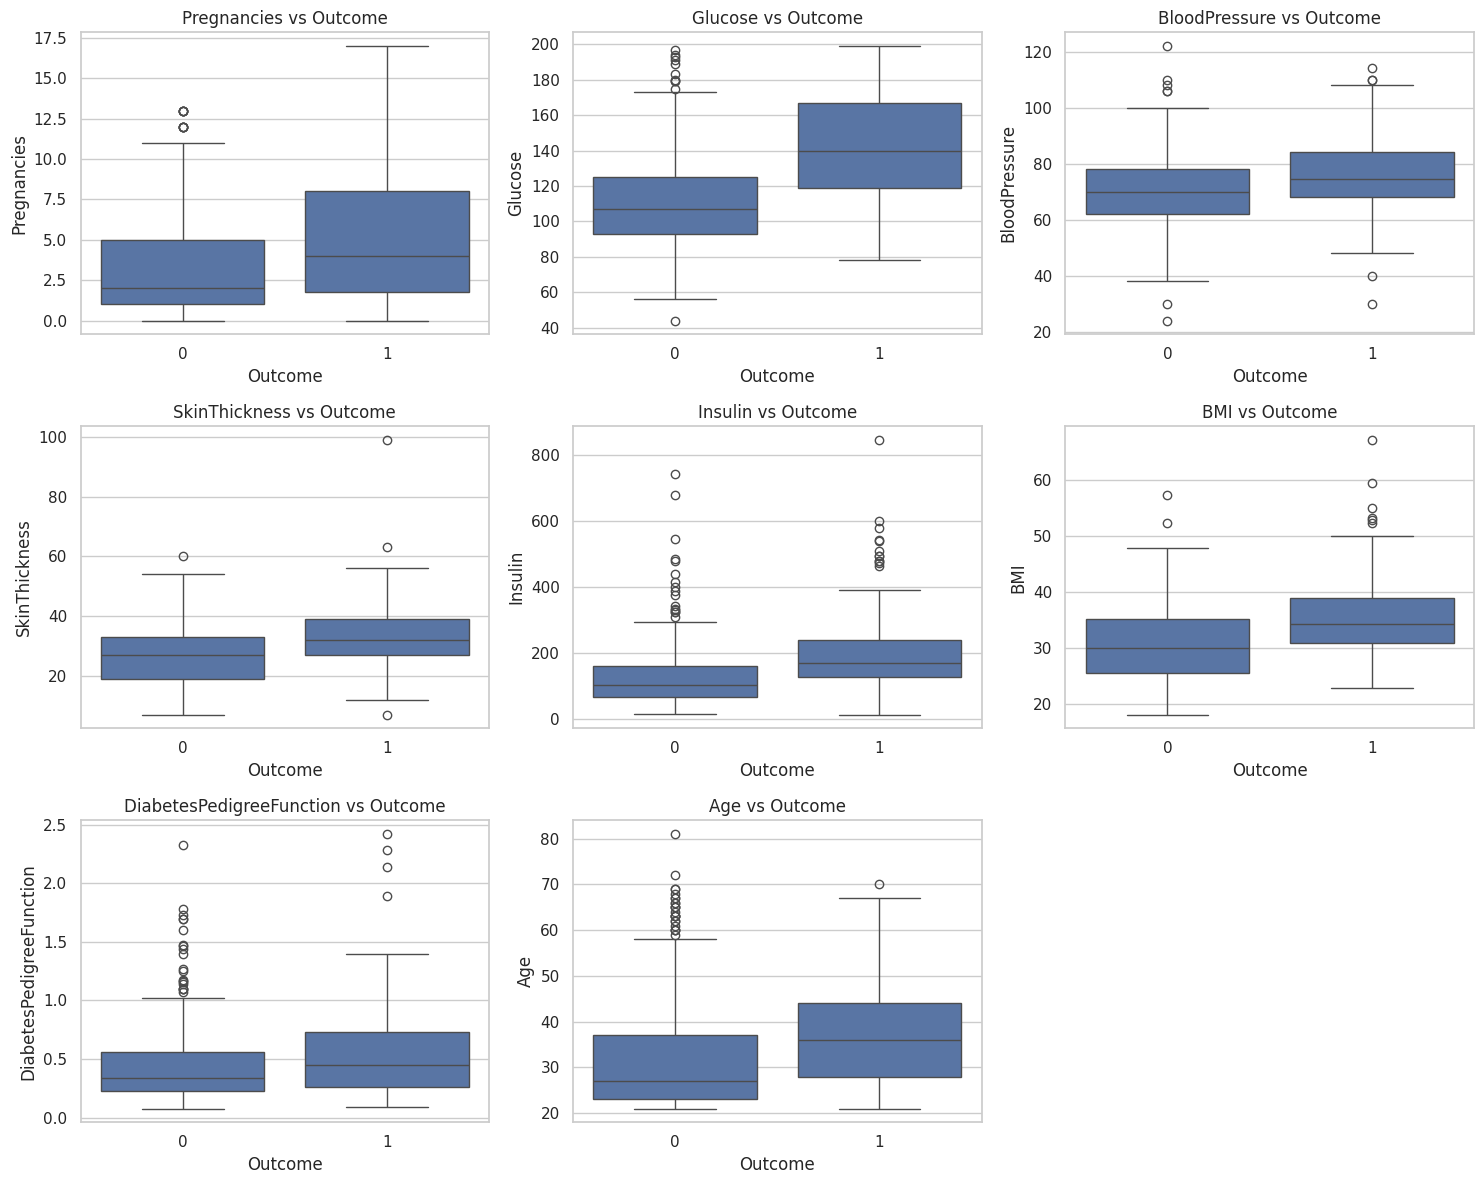

In [ ]:
import math
n_cols = 3
n_rows = math.ceil(len(numeric_cols)/n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='Outcome', y=col, data=df_clean, ax=axes[i])
    axes[i].set_title(f'{col} vs Outcome')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Density plots KDE comparând clasele pentru variabile cheie

---

Compară distribuțiile între Outcome=0 și Outcome=1 pentru variabilele critice.

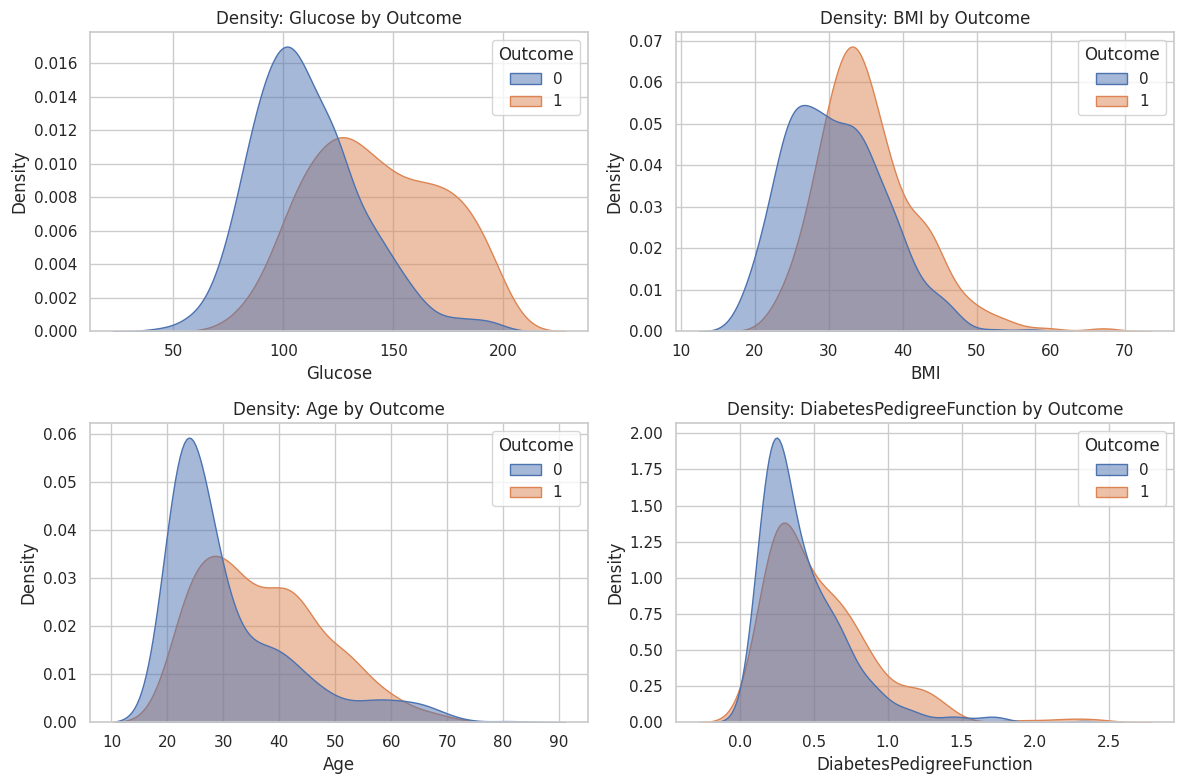

In [ ]:
cols_to_plot = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
n_cols = 2
n_rows = math.ceil(len(cols_to_plot)/n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols,4*n_rows))
axes = axes.flatten()
for i, col in enumerate(cols_to_plot):
    sns.kdeplot(data=df_clean, x=col, hue='Outcome', common_norm=False, fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Density: {col} by Outcome')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Corelații și heatmap

---

Evidențiază predictorii corelați și posibile coliniaritati.

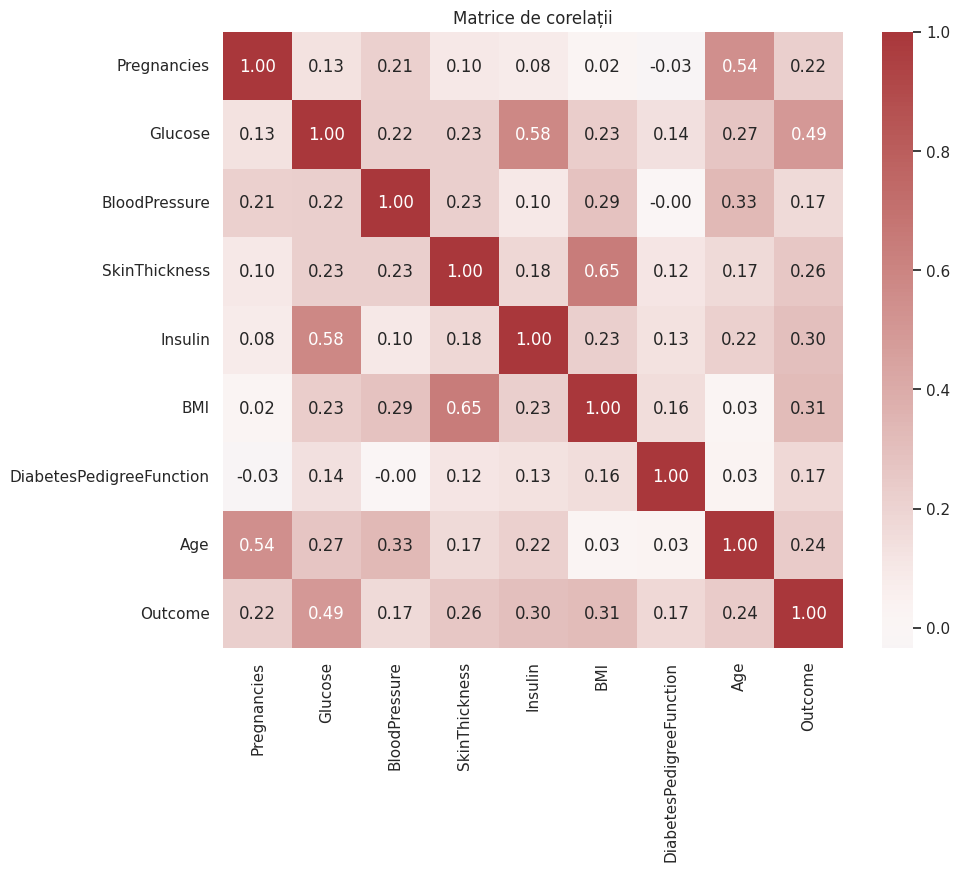

In [ ]:
corr = df_clean.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Matrice de corelații')
plt.show()

Pairplot variabile numerice curățate

---
Evidențiază diferențele între Outcome=0 și Outcome=1, folosind df_clean pentru distribuții reale.

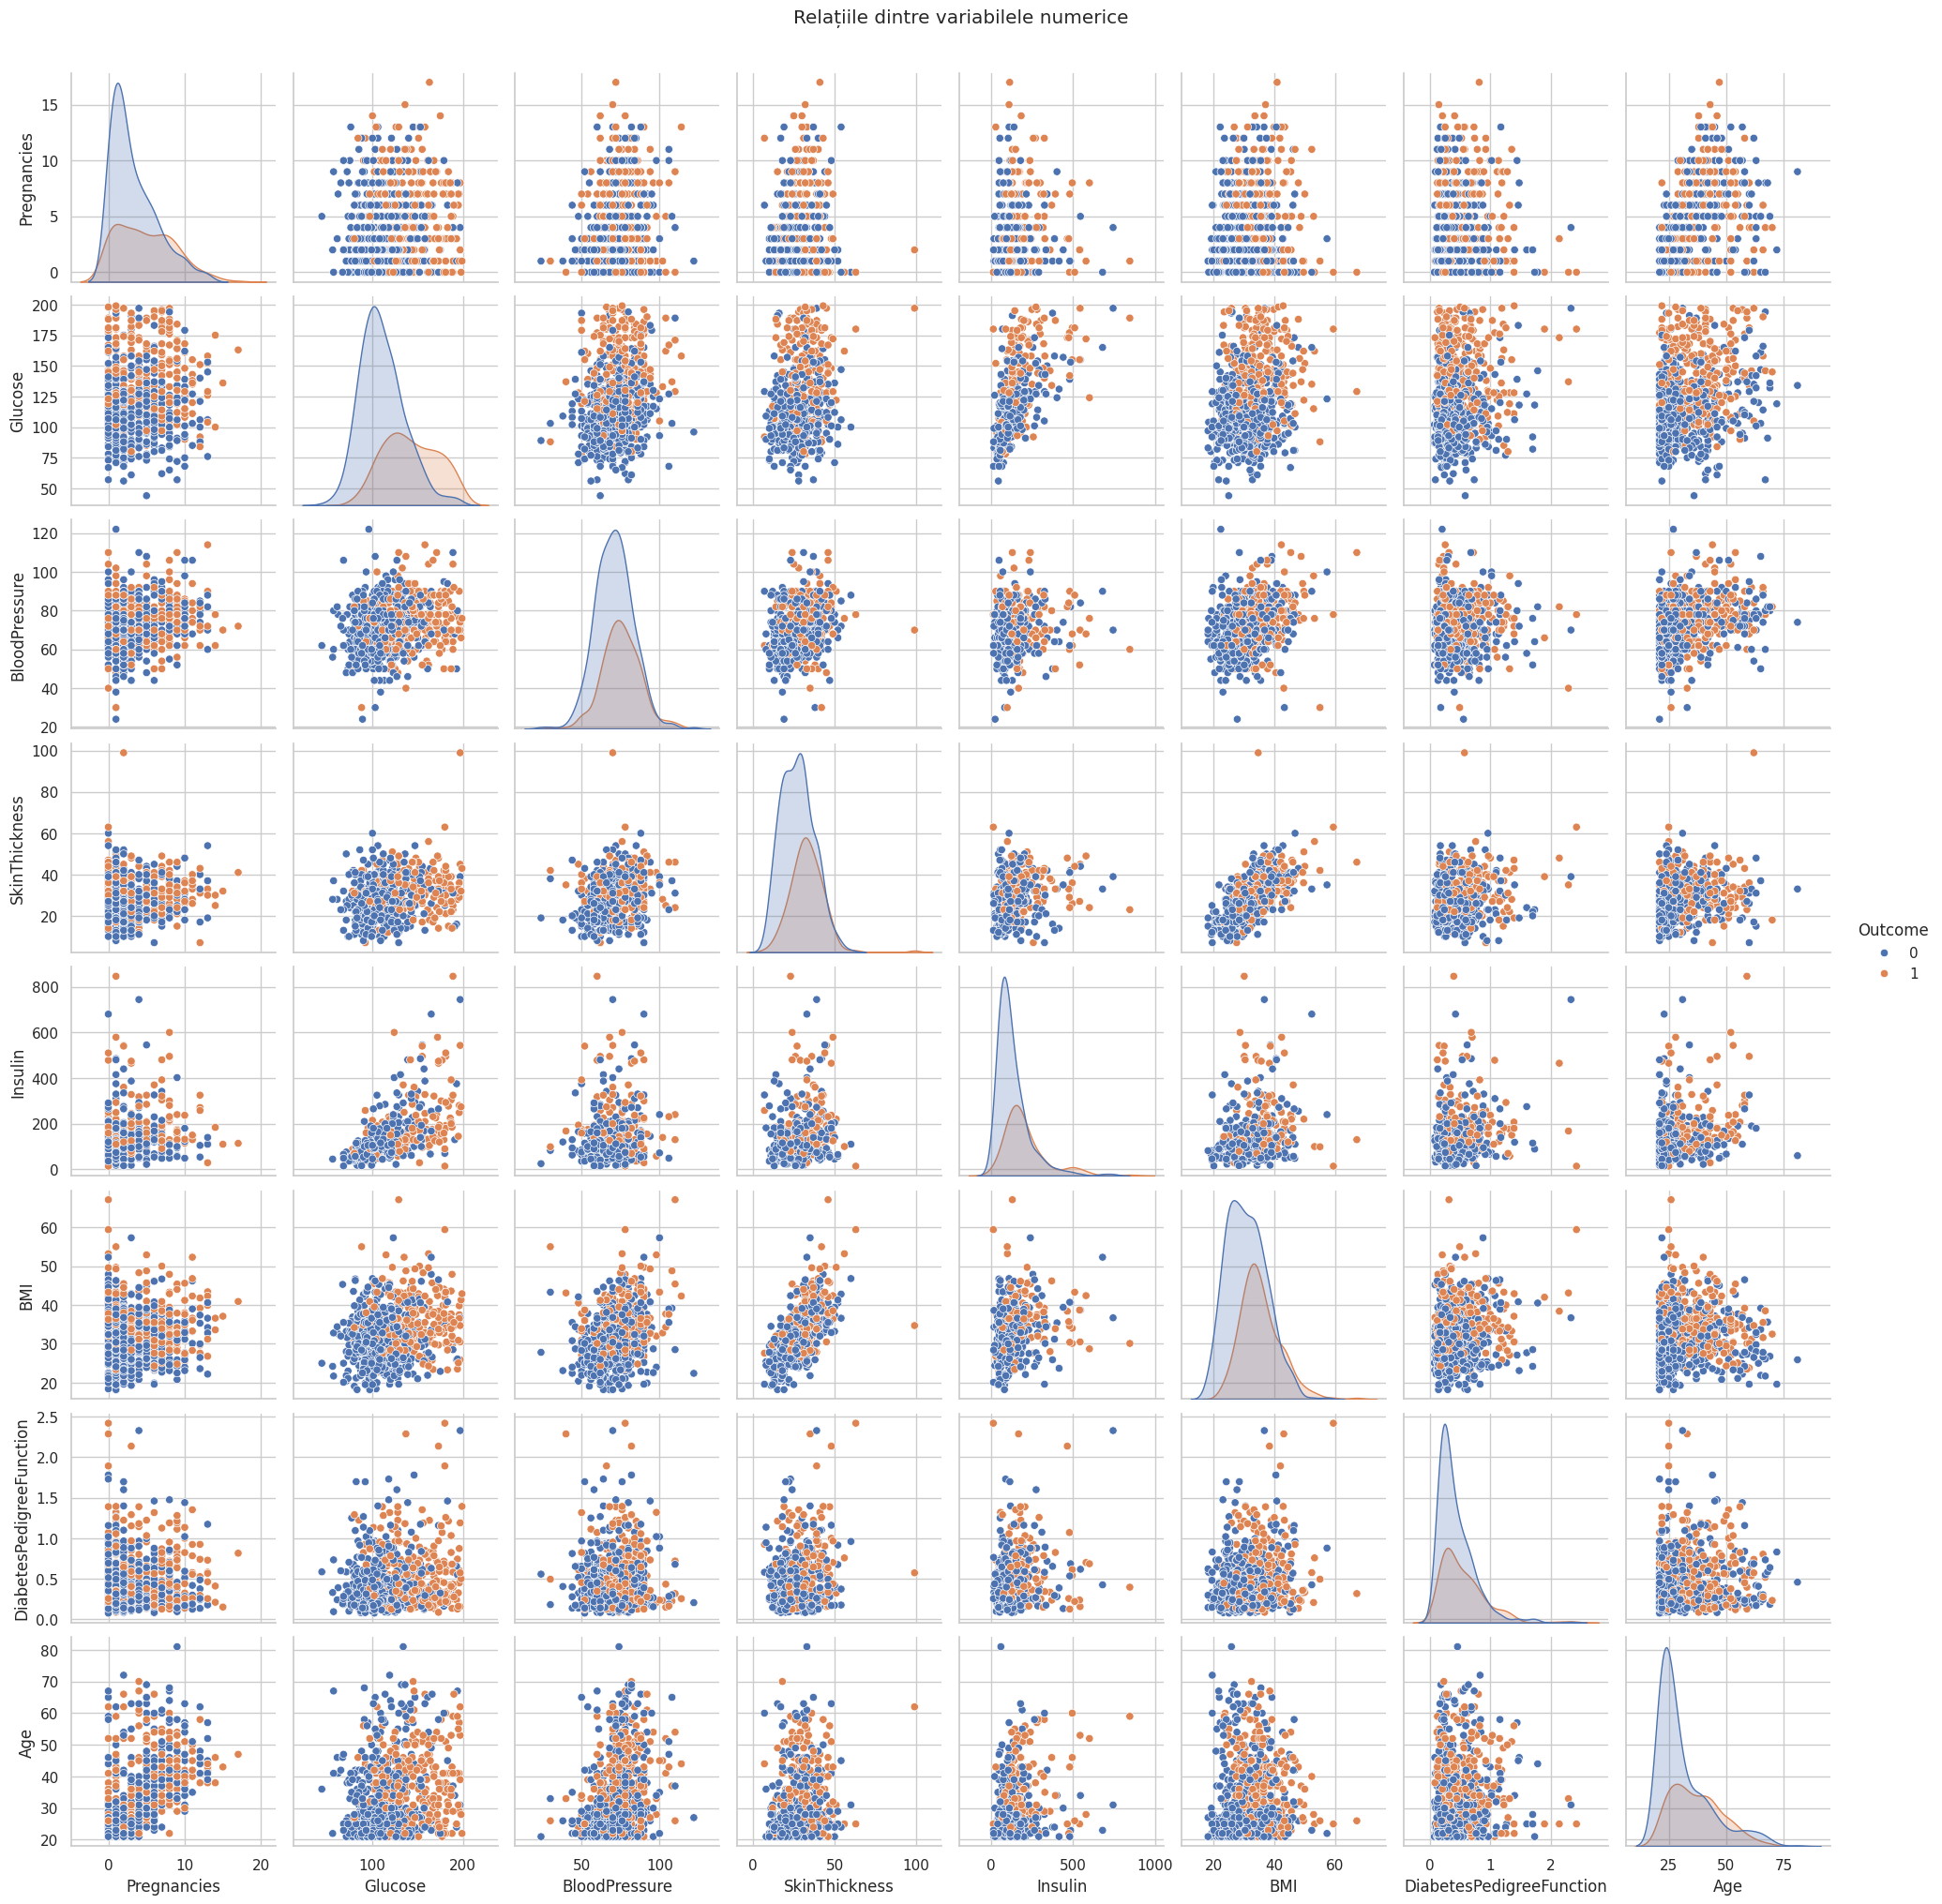

In [ ]:
sns.pairplot(df_clean, hue='Outcome')
plt.suptitle('Relațiile dintre variabilele numerice', y=1.02)
plt.show()

Test statistic Mann–Whitney U pentru toate variabilele

---

P-value mici indică diferențe semnificative între clase.

In [ ]:
results = []
numeric_cols = df_clean.columns.drop('Outcome')
for col in numeric_cols:
    group0 = df_clean[df_clean['Outcome']==0][col].dropna()
    group1 = df_clean[df_clean['Outcome']==1][col].dropna()
    try:
        stat, pvalue = mannwhitneyu(group0, group1, alternative='two-sided')
        results.append((col, stat, pvalue))
    except Exception:
        results.append((col, None, None))
res_df = pd.DataFrame(results, columns=['Caracteristică','Statistic U','p-value']).sort_values('p-value')
display(res_df)

,Caracteristică,Statistic U,p-value
1,Glucose,27393.5,1.305039e-40
7,Age,41950.0,1.142200e-17
5,BMI,40875.0,1.818811e-17
4,Insulin,9210.5,7.476986e-14
3,SkinThickness,21930.0,6.961271e-10
0,Pregnancies,50985.0,3.745146e-08
6,DiabetesPedigreeFunction,52769.0,1.196583e-06
2,BloodPressure,47566.5,1.628513e-06
